In [1]:
import pandas as pd
import numpy as np
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
from cleantext import clean

In [2]:
df = pd.read_csv(r'D:\ExcelR\Assignment Text mining\Elon_musk.csv' ,encoding='latin1')

In [3]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df.drop(columns =['Unnamed: 0'], inplace = True)

In [5]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [7]:
df.duplicated().sum()

2

In [8]:
df=df.drop_duplicates().reset_index()
df=df.drop('index',axis=1)
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1992,"@flcnhvy True, it sounds so surreal, but the n..."
1993,@PPathole Make sure to read ur terms &amp; con...
1994,@TeslaGong @PPathole Samwise Gamgee
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [9]:
df.duplicated().sum()

0

In [10]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1992,"@flcnhvy True, it sounds so surreal, but the n..."
1993,@PPathole Make sure to read ur terms &amp; con...
1994,@TeslaGong @PPathole Samwise Gamgee
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [11]:
def clean_text(text):
  text=text.lower()
  text=re.sub('\[.*?\']','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  text=re.sub("[0-9" "]+"," ",text)
  text=re.sub('[‘’“”…]','',text)
  text=re.sub("  ",'',text)
  return text

clean=lambda x:clean_text(x)

In [12]:
df["Text"] = df["Text"].apply(clean_text) 
df

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1992,flcnhvy true it sounds so surreal but the nega...
1993,ppathole make sure to read ur terms amp condit...
1994,teslagong ppathole samwise gamgee
1995,ppathole altho dumb and dumber is


In [13]:
freq=pd.Series(''.join(df['Text']).split()).value_counts()[:25]
freq

the               473
to                399
is                352
a                 351
of                312
spacex            226
in                219
amp               218
for               194
will              163
tesla             159
be                155
we                133
this              132
on                128
that              127
it                126
but               125
i                 114
with              107
are                99
erdayastronaut     98
at                 93
you                85
and                84
dtype: int64

In [14]:
stop=stopwords.words('english')
df['Text']=df['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
df

,Text
0,im alien
1,idaacarmack ray tracing cyberpunk hdr nextleve...
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...
...,...
1992,flcnhvy true sounds surreal negative propagand...
1993,ppathole make sure read ur terms amp condition...
1994,teslagong ppathole samwise gamgee
1995,ppathole altho dumb dumber


In [16]:
freq1 = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq1

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
haha                55
nasaspaceflight     55
good                51
launch              49
sure                43
yeah                41
much                40
dtype: int64

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(df["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

,term,occurrences,frequency
0,aber,1,0.000075
1,able,6,0.000449
2,abo,1,0.000075
3,aboard,1,0.000075
4,abort,3,0.000224
5,absence,1,0.000075
6,absolute,1,0.000075
7,absolutely,15,0.001121
8,absorb,1,0.000075
9,absorption,1,0.000075


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) 
doc_vec = vectorizer.fit_transform(df["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df1 = pd.DataFrame(denselist, columns = names_features)
df1

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.356769,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N - Gram

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
def get_top_n2_words(corpus, n=None):
    vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=2000)
    bag_of_words = vectorizer.fit_transform(corpus)
    words_freq = list(zip(vectorizer.get_feature_names_out(), bag_of_words.sum(axis=0).tolist()[0]))
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [23]:
df1.head()

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.356769,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
top2_words = get_top_n2_words(df["Text"], n=100) #top 100
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,rt spacex,71
1,we re,26
2,spacex falcon,17
3,erdayastronaut spacex,16
4,crew dragon,13
5,pretty much,12
6,rt nasa,12
7,waemd spacex,11
8,first stage,10
9,giga berlin,10


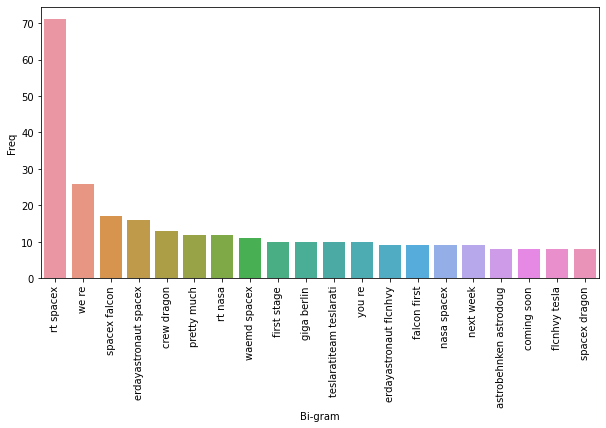

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

In [26]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [27]:
top3_words = get_top_n3_words(df["Text"], n=100)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
5,ppathole thesheetztweetz waemd,7
6,waemd spacex spacexstarlink,7
7,first stage landed,6
8,rt spacex liftoff,6
9,spacex spacexstarlink wanationalguard,6


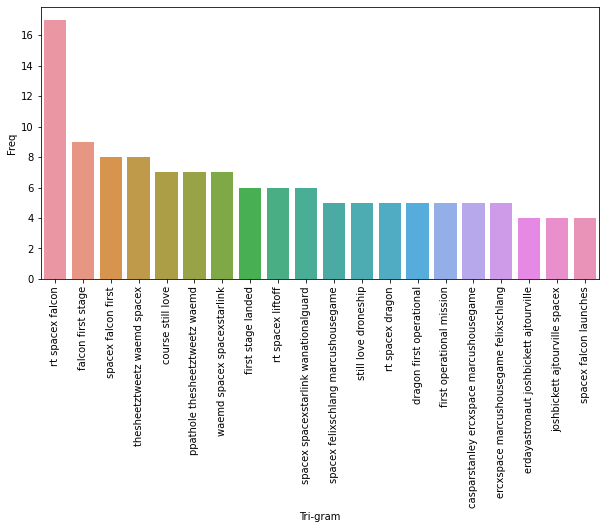

In [28]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

In [ ]:
####### WordCloud

In [29]:
string_Total = " ".join(df["Text"])

In [30]:
from wordcloud import WordCloud

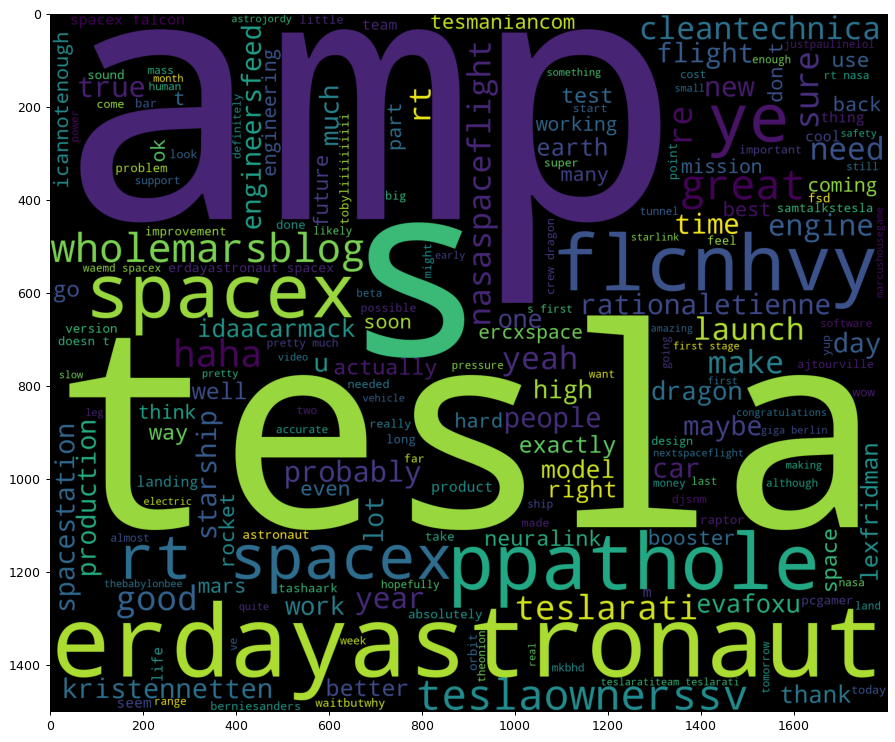

In [31]:
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

In [33]:
!pip install textblob

     -------------------------------------- 636.8/636.8 kB 8.0 MB/s eta 0:00:00


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [34]:
from textblob import TextBlob

In [36]:
sentiment_analysis = lambda ds: pd.Series(TextBlob(ds["Text"]).sentiment)

df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)

df.head(11)

,Text,subjectivity,polarity
0,im alien,-0.250000,0.750000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.800000,0.750000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.200000,0.322222
5,happy new year ox,0.468182,0.727273
6,frodo underdoge thought would fail httpstcozgx...,-0.500000,0.300000
7,owensparks flcnhvy haha thanks,0.200000,0.250000
8,flcnhvy indeed tweets definitely represent rea...,0.000000,0.500000
9,entertaining outcome likely,0.250000,0.850000


In [39]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [40]:
elon_tweets=df.copy()
elon_tweets["tweet_kind"] = elon_tweets["polarity"].apply(analysis)
elon_tweets

,Text,subjectivity,polarity,tweet_kind
0,im alien,0.750000,-0.250000,Negative
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000,Neutral
2,joerogan spotify great interview,0.750000,0.800000,Positive
3,doge underestimated,0.000000,0.000000,Neutral
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000,Positive
...,...,...,...,...
1992,flcnhvy true sounds surreal negative propagand...,0.508333,0.111111,Positive
1993,ppathole make sure read ur terms amp condition...,0.888889,0.500000,Positive
1994,teslagong ppathole samwise gamgee,0.000000,0.000000,Neutral
1995,ppathole altho dumb dumber,0.500000,-0.375000,Negative


In [41]:
elon_tweets.describe()

,subjectivity,polarity
count,1997.000000,1997.000000
mean,0.311290,0.122350
std,0.327634,0.259052
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.250000,0.000000
75%,0.566667,0.238889
max,1.000000,1.000000


In [42]:
elon_tweets['tweet_kind'].value_counts()

Neutral     960
Positive    838
Negative    199
Name: tweet_kind, dtype: int64

C:\Users\Harshal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


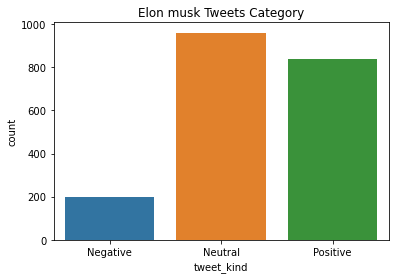

In [43]:
sns.countplot(elon_tweets['tweet_kind']).set_title("Elon musk Tweets Category")
plt.show()